# Homework 3
#### General:
- Implement logistic regression learning by gradient ascent
- Normalize training set to have mean 0 and std. dev. 1 before regression
- Apply the training set transformation to the test set

#### Specifications:
- Train a logistic regressor on the training set of the requested datasets (`Gisette`, `hill-valley`, or `dexter`)
- Start with **w**$^{(0)}$ = 0, 300 gradient ascent iterations, and shrinkage $\lambda$ = 0.0001 in the update equation:
    - **w**$^{(t+1)}$ = **w**$^{(t)}$ - $\eta\lambda$**w**$^{(t)}$ + $\frac{\eta}{N}\frac{\partial L(\mathbf{w}^{(t)})}{\partial \mathbf{w}}$
    - $L (\mathbf{w}^{(t)})$ is the log-likelihood
    - Note the extra factor of $\frac{1}{N}$ in the loss term
    
#### Requested Output:
- Find a good learning rate $\eta$ such that log-likelihood converges in ~300 iterations and is monotonically increasing
- Plot the log-likelihood vs iteration number
- Report in a table the misclassification eror on the training and test set

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
#for normalizing data
from sklearn.preprocessing import StandardScaler
#for testing accuracy
from sklearn.metrics import accuracy_score

In [3]:
#Read in the data for problem 1
gis_train = pd.read_csv("../datasets/Gisette/gisette_train.data", sep = ' ', header=None).dropna(axis=1)
gis_train_labels = np.where(np.ravel(pd.read_csv("../datasets/Gisette/gisette_train.labels", sep = ' ', header=None).values) == -1, 0, 1)
gis_test = pd.read_csv("../datasets/Gisette/gisette_valid.data", sep = ' ', header=None).dropna(axis=1)
gis_test_labels = np.where(np.ravel(pd.read_csv("../datasets/Gisette/gisette_valid.labels", sep = ' ', header=None).values) == -1, 0, 1)

In [4]:
#Read in the data for problem 2
hill_Xtrain = pd.read_csv("../datasets/hill-valley/X.dat", sep = ' ', header=None).dropna(axis=1)
hill_ytrain = pd.read_csv("../datasets/hill-valley/y.dat", sep = ' ', header=None)
hill_Xtest = pd.read_csv("../datasets/hill-valley/Xtest.dat", sep = ' ', header=None).dropna(axis=1)
hill_ytest = pd.read_csv("../datasets/hill-valley/ytest.dat", sep = ' ', header=None)

In [5]:
#Read in the data for problem 3
dexter_train = pd.read_csv("../datasets/dexter/dexter_train.csv", header=None).dropna(axis=1)
dexter_train_labels = np.where(np.ravel(pd.read_csv("../datasets/dexter/dexter_train.labels", sep = ' ', header=None).values) == -1, 0, 1)
dexter_test = pd.read_csv("../datasets/dexter/dexter_valid.csv", header=None).dropna(axis=1)
dexter_test_labels = np.where(np.ravel(pd.read_csv("../datasets/dexter/dexter_valid.labels", sep = ' ', header=None).values) == -1, 0, 1)

In [75]:
#Normalize the training data in gisette to have mean 0 and standard deviation 1
sc_gis = StandardScaler()
sc_gis.fit(gis_train)
gis_train_norm = sc_gis.transform(gis_train)
#apply the same transformation to testing data
gis_test_norm = sc_gis.transform(gis_test)

In [67]:
def run_clf(X_train, y_train, X_test, y_test, iters):
    clf = SGDClassifier(loss="log", max_iter=iters, random_state = 42, learning_rate='constant', eta0=0.1, shuffle=True).fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train)
    accuracy_test = clf.score(X_test, y_test)
    print("Training set accuracy: ", round(accuracy_train*100,4), "%")
    print("Testing set accuracy: ", round(accuracy_test*100,4), "%")
    return accuracy_train, accuracy_test

In [70]:
run_clf(gis_train_normalized, gis_train_labels, gis_test_normalized, gis_test_labels, 300)

Training set accuracy:  100.0 %
Testing set accuracy:  97.3 %


(1.0, 0.973)

In [11]:
#this code was adapted from: 
# https://vasugupta2000.medium.com/implementation-of-gradient-ascent-using-logistic-regression-7f5343877c21

class LogReg():
    
    def __init__(self, learning_rate=0.01, max_iters=300, shrinkage=0.0001):
        '''
        initialize variables
        
        Parameters:
        learning_rate: learning rate (float)
        max_iters: max iterations desired (int)
        shrinkage: lambda in the update equation (float)
        '''
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.shrinkage = shrinkage
        self.likelihoods = []
        # Define epsilon so the natural logarithm is not undefined
        self.epsilon = 1e-7
    
    #Define necessary functions to calculate gradient ascent
    def sigmoid(self, x):
        ''' 
        Sigmoid function

        Parameters:
        x : int, float or numpy array

        Returns:
        the sigmoid function applied to each element in the array
        '''
        return 1 / (1 + np.exp(-x))

    def log_likelihood(self, y_true, y_pred):
        '''
        Calculates the likelihood function for logistic regression

        Parameters:
        x: 2D numpy array of x values (num_obs, num_features)
        y: 1D numpy array of y values (num_obs, )
        w0: initial weight
        weights: numpy array of weights (num_features,)

        Returns:
        Maximum log likelihood, scalar value
        '''
        
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.epsilon), np.minimum(np.full(y_pred.shape, 1-self.epsilon), y_pred))
        #basic equation 
        return np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    

    def predict_proba(self, X):
                       
        z = np.dot(X, self.weights)
        probabilities = self.sigmoid(z)
                
        return probabilities
    
    
    def predict(self, X, threshold=0.5):
        # Thresholding probability to predict binary values
        binary_predictions = np.array(list(map(lambda x: 1 if x > threshold else 0, self.predict_proba(X))))
        
        return binary_predictions

    def fit(self, X, y):
        '''
        Train the logistic regression model using gradient ascent

        Parameters:
        x: 2D numpy array of x values (num_obs, num_features)
        y: 1D numpy array of y values (num_obs, )

        Returns:
        void
        '''

        num_obs = X.shape[0]
        num_feats = X.shape[1]

        #Initialize weights as 0 vector with proper shape
        self.weights = np.zeros(num_feats)

        #Actually do the gradient ascent
        for i in range(self.max_iters):
            z = np.dot(X, self.weights)
            y_pred = self.sigmoid(z)

            #calculate the gradient
            gradient = np.dot(X.T, y - y_pred)

            #update the weights
            self.weights = self.weights - (self.shrinkage * self.learning_rate * self.weights) + ((self.learning_rate * gradient) / num_obs) 

            #calculate the log likelihood and store in a list
            likelihood = self.log_likelihood(y, y_pred)
            self.likelihoods.append(likelihood)
        #self.likelihoods = np.array(self.likelihoods)

# Problem 1.a: Gisette Dataset Logistic Regression

In [100]:
#Run the logistic regression on Gisette dataset with learning rate = 0.1
clf_gis = LogReg(learning_rate=0.1)
clf_gis.fit(gis_train_norm, gis_train_labels)

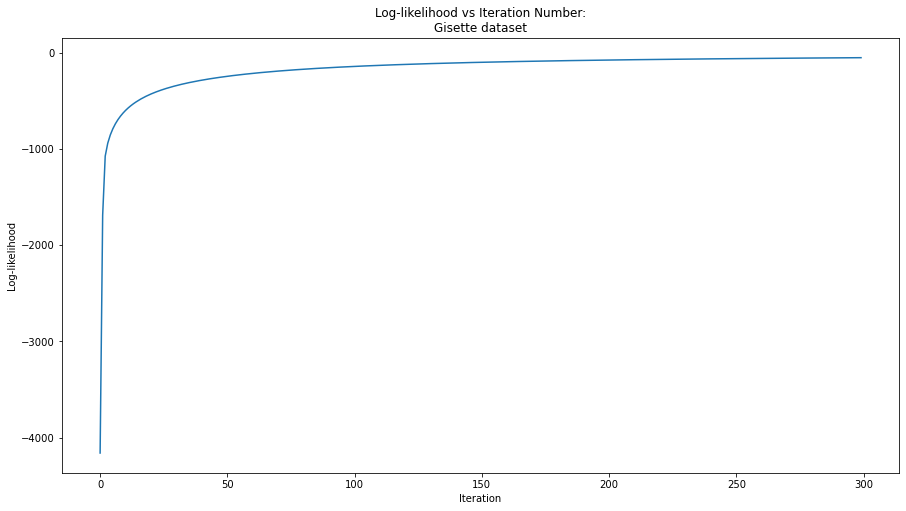

In [196]:
#Plot the log likelihood for Gisette dataset
#size of plot
plt.rcParams['figure.figsize'] = [15,8]

plt.plot([i for i in range(len(clf_gis.likelihoods))], clf_gis.likelihoods)
plt.title("Log-likelihood vs Iteration Number:\nGisette dataset")
plt.xlabel("Iteration")
plt.ylabel("Log-likelihood")
plt.show()

In [102]:
#Find misclassification error for Gisette dataset
gis_train_preds = clf_gis.predict(gis_train_norm)
gis_test_preds = clf_gis.predict(gis_test_norm)
gis_train_err = 1 - accuracy_score(gis_train_labels, gis_train_preds)
gis_test_err = 1 - accuracy_score(gis_test_labels, gis_test_preds)
print(gis_train_err, gis_test_err)

0.0 0.02100000000000002


# Problem 1.b: Hill-valley Dataset  Logistic Regression
-  Repeat point a) on the hill-valley dataset, where you might need more than 300 iterations.

In [160]:
#Normalize the training data in hill-valley to have mean 0 and standard deviation 1
sc_hill = StandardScaler()
sc_hill.fit(hill_Xtrain)
hill_Xtrain_norm = sc_hill.transform(hill_Xtrain)
#apply the same transformation to testing data
hill_Xtest_norm = sc_hill.transform(hill_Xtest)

In [162]:
#Run the logistic regression on hill-valley dataset with learning rate = 0.075
clf_hill = LogReg(learning_rate = 0.075, max_iters=300000)
clf_hill.fit(hill_Xtrain_norm, hill_ytrain[0])

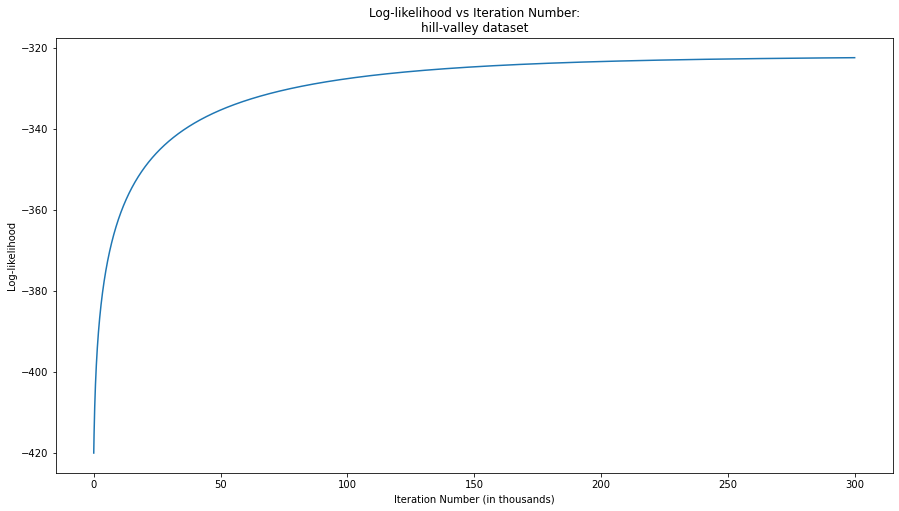

In [194]:
#Plot the log likelihood for hill-valley dataset

#size of plot
plt.rcParams['figure.figsize'] = [15,8]

plt.plot([i/1000 for i in range(len(clf_hill.likelihoods))], clf_hill.likelihoods)
plt.title("Log-likelihood vs Iteration Number:\nhill-valley dataset")
plt.xlabel("Iteration Number (in thousands)")
plt.ylabel("Log-likelihood")
plt.show()

In [164]:
#Find misclassification error for hill-valley dataset
hill_train_preds = clf_hill.predict(hill_Xtrain_norm)
hill_test_preds = clf_hill.predict(hill_Xtest_norm)
hill_train_err = 1 - accuracy_score(hill_ytrain, hill_train_preds)
hill_test_err = 1 - accuracy_score(hill_ytest, hill_test_preds)
print(hill_train_err, hill_test_err)

0.26732673267326734 0.3085808580858086


# Problem 1.c: Dexter Dataset Logistic Regression
-  Repeat point a) on the dexter dataset

In [166]:
#Normalize the training data in dexter to have mean 0 and standard deviation 1
sc_dexter = StandardScaler()
sc_dexter.fit(dexter_train)
dexter_train_norm = sc_dexter.transform(dexter_train)
#apply the same transformation to testing data
dexter_test_norm = sc_dexter.transform(dexter_test)

In [207]:
#Run the logistic regression on dexter dataset with default learning rate 0.01
clf_dexter = LogReg()
clf_dexter.fit(dexter_train_norm, dexter_train_labels)

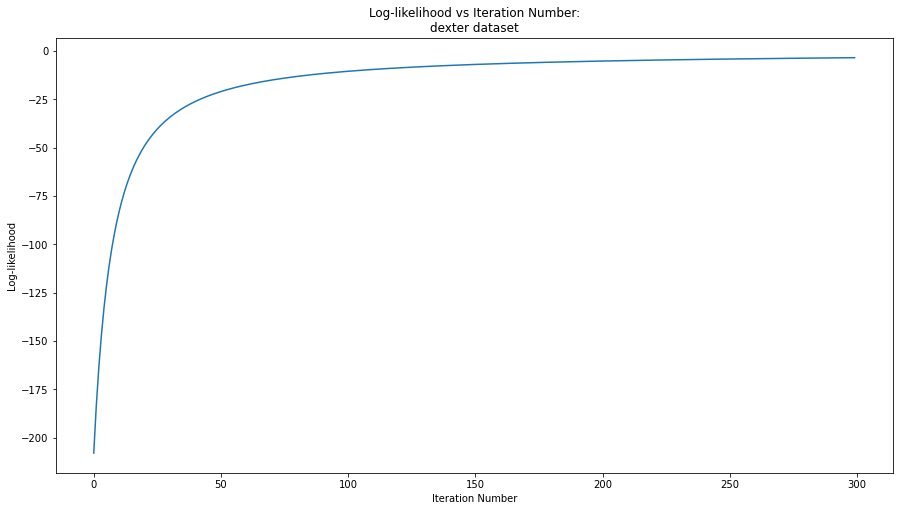

In [208]:
#Plot the log likelihood for dexter dataset
#size of plot
plt.rcParams['figure.figsize'] = [15,8]

plt.plot([i for i in range(len(clf_dexter.likelihoods))], clf_dexter.likelihoods)
plt.title("Log-likelihood vs Iteration Number:\ndexter dataset")
plt.xlabel("Iteration Number")
plt.ylabel("Log-likelihood")
plt.show()

In [209]:
#Find misclassification error for dexter dataset
dexter_train_preds = clf_dexter.predict(dexter_train_norm)
dexter_test_preds = clf_dexter.predict(dexter_test_norm)
dexter_train_err = 1 - accuracy_score(dexter_train_labels, dexter_train_preds)
dexter_test_err = 1 - accuracy_score(dexter_test_labels, dexter_test_preds)
print(dexter_train_err, dexter_test_err)

0.0 0.14


In [236]:
# Create table labels
rows_labels = ["Gisette","hill-valley", "dexter",]
columns_labels = ["Dataset","Training Error","Test Error"]

# Store the misclassification error from each dataset for training and testing
misclassification_errors = {
    columns_labels[1]: [gis_train_err, hill_train_err, dexter_train_err],
    columns_labels[2]: [gis_test_err, hill_test_err, dexter_test_err]
}

# Create dataframe to output table
error_table=pd.DataFrame(misclassification_errors, index=rows_labels)
#error_table.index.name = columns_labels[0]
error_table

,Training Error,Test Error
Gisette,0.000000,0.021000
hill-valley,0.267327,0.308581
dexter,0.000000,0.140000
